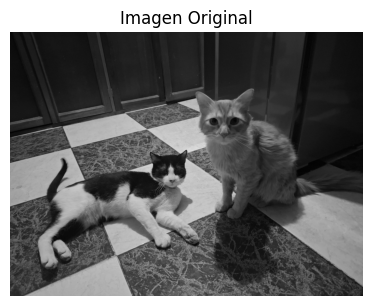

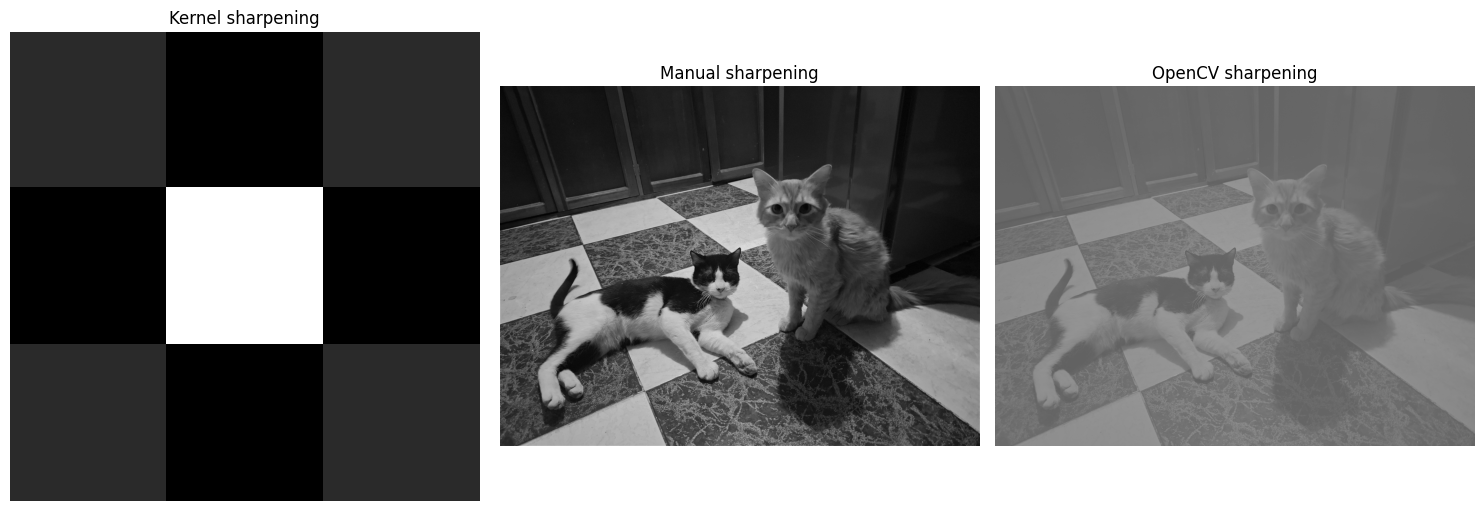

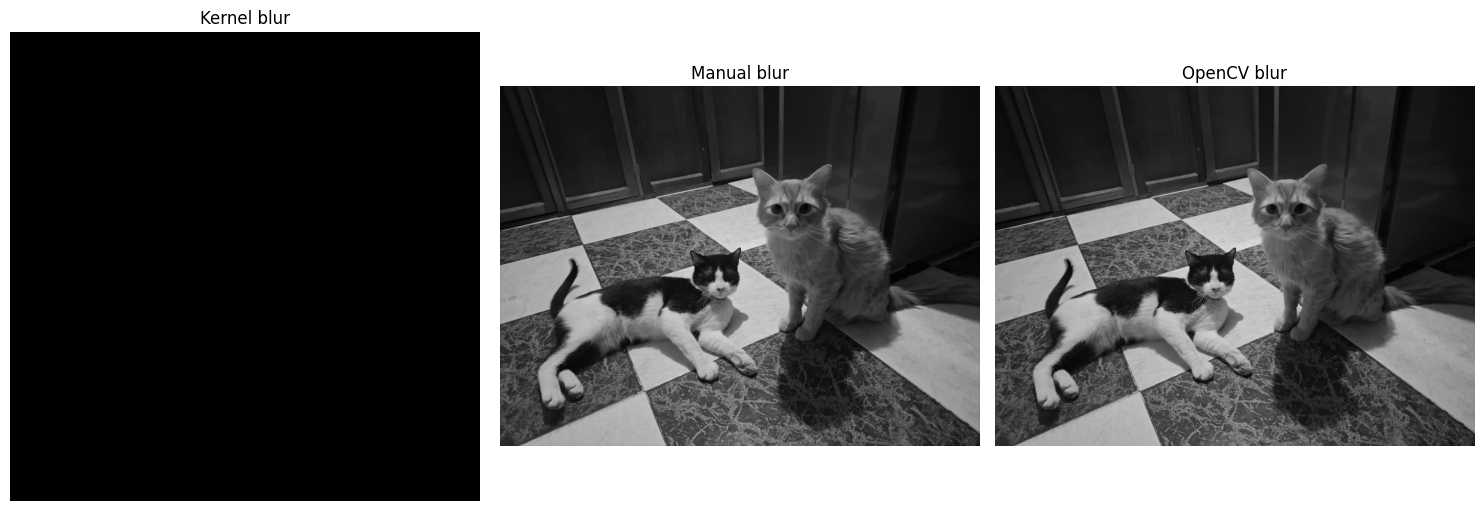

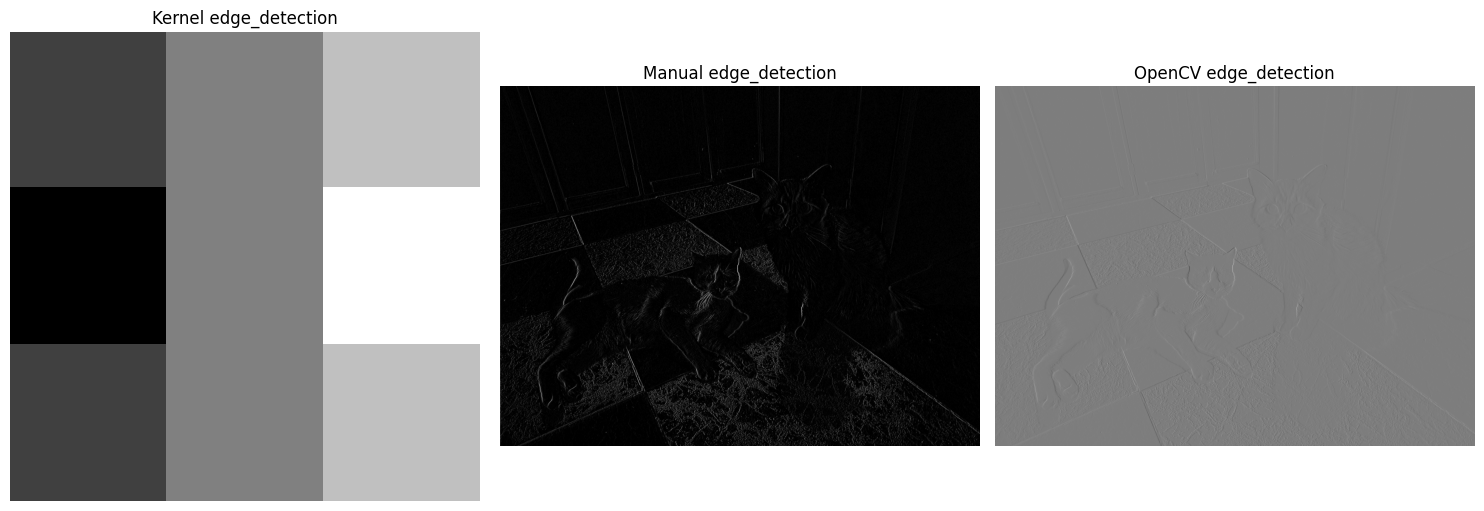

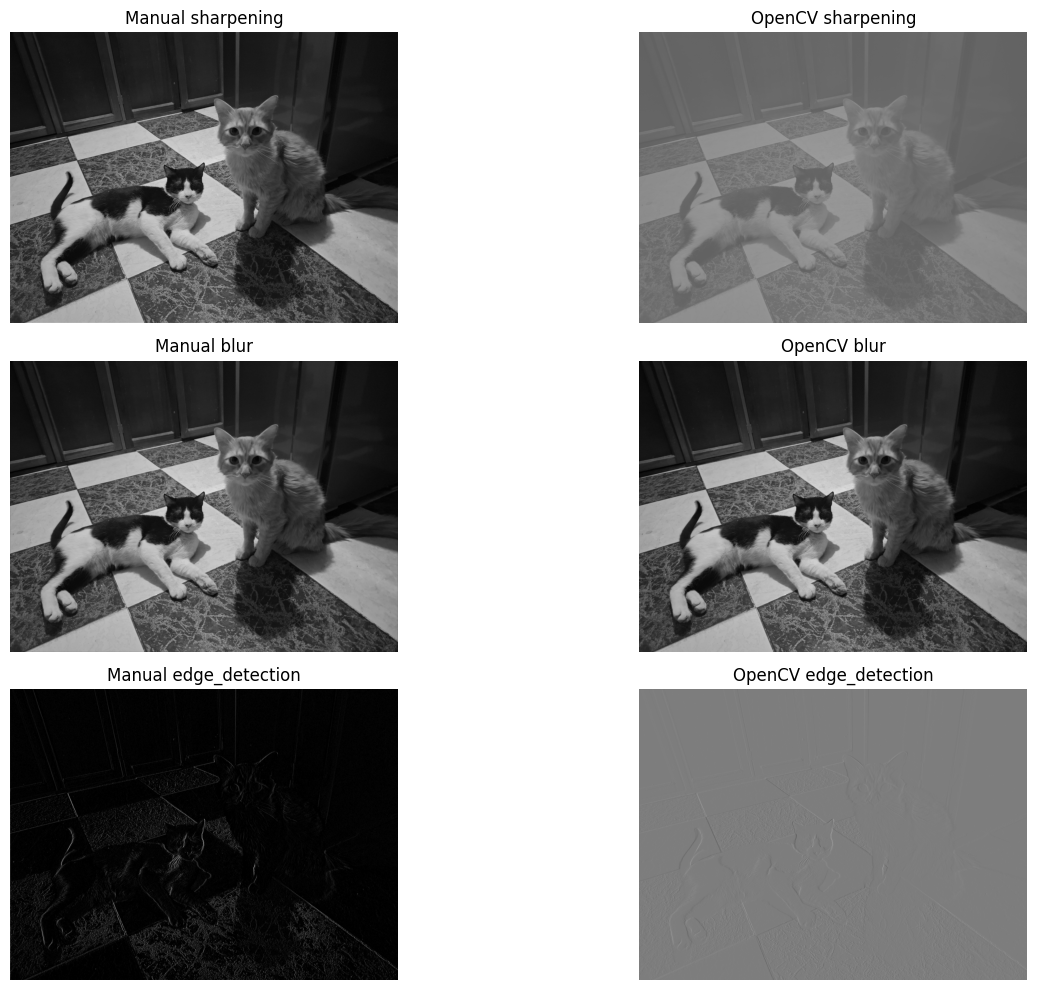

In [1]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow  # Solo para Colab

# Cargar imagen en escala de grises
image_path = '/content/MichiJuanP3.jpg'  # Cambiar por tu imagen
gray_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

if gray_image is None:
    raise ValueError("No se pudo cargar la imagen. Verifica la ruta.")

# Mostrar imagen original
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

# Normalizar la imagen si no está en el rango 0-255
if gray_image.max() > 1:
    gray_image = gray_image.astype(np.float32) / 255.0

# Función de convolución 2D manual
def manual_conv2d(image, kernel):
    """
    Aplica convolución 2D manualmente a una imagen con un kernel dado.

    Args:
        image: Imagen de entrada (2D numpy array)
        kernel: Kernel de convolución (2D numpy array, tamaño impar)

    Returns:
        Imagen convolucionada (2D numpy array)
    """
    # Obtener dimensiones
    img_h, img_w = image.shape
    kernel_h, kernel_w = kernel.shape

    # Verificar que el kernel sea cuadrado y de tamaño impar
    if kernel_h != kernel_w or kernel_h % 2 == 0:
        raise ValueError("El kernel debe ser cuadrado y de tamaño impar")

    pad_size = kernel_h // 2
    padded_img = np.pad(image, pad_size, mode='constant')

    # Crear imagen de salida
    output = np.zeros_like(image)

    # Aplicar convolución
    for i in range(img_h):
        for j in range(img_w):
            # Extraer la región de interés
            roi = padded_img[i:i+kernel_h, j:j+kernel_w]
            # Multiplicar y sumar
            output[i, j] = np.sum(roi * kernel)

    # Recortar valores fuera de rango
    output = np.clip(output, 0, 1)

    return output

# Definición de kernels
kernels = {
    # Sharpening (Enfocado)
    'sharpening': np.array([
        [0, -1, 0],
        [-1, 5, -1],
        [0, -1, 0]
    ]),

    # Blur (Suavizado)
    'blur': (1/9) * np.array([
        [1, 1, 1],
        [1, 1, 1],
        [1, 1, 1]
    ]),

    # Detección de bordes (Sobel en X)
    'edge_detection': np.array([
        [-1, 0, 1],
        [-2, 0, 2],
        [-1, 0, 1]
    ])
}

# Aplicar convoluciones manuales y con OpenCV
results = {}

for name, kernel in kernels.items():
    # Convolución manual
    manual_result = manual_conv2d(gray_image, kernel)

    # Convolución con OpenCV
    opencv_result = cv2.filter2D(gray_image, -1, kernel)

    # Almacenar resultados
    results[name] = {
        'manual': manual_result,
        'opencv': opencv_result,
        'kernel': kernel
    }

# Visualización de resultados
for name, result in results.items():
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(result['kernel'], cmap='gray')
    plt.title(f'Kernel {name}')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(result['manual'], cmap='gray')
    plt.title(f'Manual {name}')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.imshow(result['opencv'], cmap='gray')
    plt.title(f'OpenCV {name}')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Comparación adicional para análisis
plt.figure(figsize=(15, 10))

for i, (name, result) in enumerate(results.items(), 1):
    plt.subplot(3, 2, 2*i-1)
    plt.imshow(result['manual'], cmap='gray')
    plt.title(f'Manual {name}')
    plt.axis('off')

    plt.subplot(3, 2, 2*i)
    plt.imshow(result['opencv'], cmap='gray')
    plt.title(f'OpenCV {name}')
    plt.axis('off')

plt.tight_layout()
plt.show()